In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
df = pd.read_csv(r"C:\Users\hassa\OneDrive\Desktop\Predict salary for uber trips\data\Uber_booking_status.csv")

def analyze_dataframe(df):

    print("DataFrame Information:")
    print("----------------------")
    display(df.info(verbose=True, show_counts=True))
    print("\n")

    print("DataFrame Values (head(5).T):")
    print("----------------------")
    display(df.head(5).T)
    print("\n")

    print("DataFrame Description:")
    print("----------------------")
    display(df.describe(include="all").T)
    print("\n")

    print("Number of Null Values:")
    print("----------------------")
    display(df.isnull().sum())
    print("\n")

    print("Number of Duplicated Rows:")
    print("--------------------------")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Unique Values:")
    print("------------------------")
    display(df.nunique())
    print("\n")


    print("DataFrame Shape:")
    print("----------------")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

analyze_dataframe(df)

DataFrame Information:
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day  

None



DataFrame Values (head(5).T):
----------------------


,0,1,2,3,4
User ID,KHVrEVlD,lPxIuEri,gsVN8JLS,9I7kWFgd,8QN5ZaGN
User Name,Kimberly Adams,Justin Tapia,Elizabeth Lopez,Steven Wilson,Alexander Andrews
Driver Name,Amy Butler,Hannah Zimmerman,Amanda Jackson,Amy Horn,Cassandra Larson
Car Condition,Very Good,Excellent,Bad,Very Good,Bad
Weather,windy,cloudy,stormy,stormy,stormy
Traffic Condition,Congested Traffic,Flow Traffic,Congested Traffic,Flow Traffic,Congested Traffic
key,2009-06-15 17:26:21.0000001,2010-01-05 16:52:16.0000002,2011-08-18 00:35:00.00000049,2012-04-21 04:30:42.0000001,2010-03-09 07:51:00.000000135
fare_amount,4.5,16.9,5.7,7.7,5.3
pickup_datetime,2009-06-15 17:26:21,2010-01-05 16:52:16,2011-08-18 00:35:00,2012-04-21 04:30:42,2010-03-09 07:51:00
pickup_longitude,-1.288826,-1.291824,-1.291242,-1.291319,-1.290987




DataFrame Description:
----------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,500000,500000,hY0LJwQ7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User Name,500000,221675,Michael Smith,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver Name,500000,221700,Michael Smith,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car Condition,500000,4,Very Good,125312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weather,500000,5,sunny,100433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Traffic Condition,500000,3,Congested Traffic,166847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
key,500000,500000,2011-12-12 07:15:00.000000133,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,500000.0,NaN,NaN,NaN,11.358361,9.916617,-44.9,6.0,8.5,12.5,500.0
pickup_datetime,500000,461206,2012-01-26 21:22:00,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,500000.0,NaN,NaN,NaN,-1.265712,0.206941,-52.119764,-1.291405,-1.291226,-1.29097,37.360538




Number of Null Values:
----------------------


User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64



Number of Duplicated Rows:
--------------------------


np.int64(0)



Number of Unique Values:
------------------------


User ID              500000
User Name            221675
Driver Name          221700
Car Condition             4
Weather                   5
Traffic Condition         3
key                  500000
fare_amount            1688
pickup_datetime      461206
pickup_longitude      95037
pickup_latitude      119115
dropoff_longitude    108283
dropoff_latitude     135053
passenger_count           7
hour                     24
day                      31
month                    12
weekday                   7
year                      7
jfk_dist             490613
ewr_dist             490613
lga_dist             490613
sol_dist             490613
nyc_dist             490613
distance             485705
bearing              485636
dtype: int64



DataFrame Shape:
----------------
Rows: 500000, Columns: 26


In [15]:
df.drop(columns=["User ID", "User Name", "Driver Name", "key"], inplace=True)

(df['fare_amount'] < 0).sum()

df.drop(df[df['fare_amount'] < 0].index, inplace=True)

df.dropna(inplace=True)

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)


df['rush_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0)

df["bearing_sin"] = np.sin(df["bearing"])
df["bearing_cos"] = np.cos(df["bearing"])

for col in ["Car Condition", "Weather", "Traffic Condition"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])



df.drop(columns=["bearing",'pickup_datetime','pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)







'''df['car_type'] = df['passenger_count'].apply(lambda x: 'big_car' if x >= 5 else 'small_car')

def get_time_category(hour):
    if 6 <= hour < 9:
        return 'morning_rush'
    elif 16 <= hour < 19:
        return 'evening_rush'
    elif 0 <= hour < 6:
        return 'late_night'
    elif 9 <= hour < 16:
        return 'daytime'
    else:
        return 'night'

df['time_category'] = df['hour'].apply(get_time_category)

df['season'] = df['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                3: 'Spring', 4: 'Spring', 5: 'Spring',
                                6: 'Summer', 7: 'Summer', 8: 'Summer',
                                9: 'Fall', 10: 'Fall', 11: 'Fall'})


df.drop(columns = ['day','hour','month','pickup_datetime','passenger_count','User Name','Driver Name','User ID','key','pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'] , inplace = True)'''


"df['car_type'] = df['passenger_count'].apply(lambda x: 'big_car' if x >= 5 else 'small_car')\n\ndef get_time_category(hour):\n    if 6 <= hour < 9:\n        return 'morning_rush'\n    elif 16 <= hour < 19:\n        return 'evening_rush'\n    elif 0 <= hour < 6:\n        return 'late_night'\n    elif 9 <= hour < 16:\n        return 'daytime'\n    else:\n        return 'night'\n\ndf['time_category'] = df['hour'].apply(get_time_category)\n\ndf['season'] = df['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',\n                                3: 'Spring', 4: 'Spring', 5: 'Spring',\n                                6: 'Summer', 7: 'Summer', 8: 'Summer',\n                                9: 'Fall', 10: 'Fall', 11: 'Fall'})\n\n\ndf.drop(columns = ['day','hour','month','pickup_datetime','passenger_count','User Name','Driver Name','User ID','key','pickup_longitude',\n       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'] , inplace = True)"

In [16]:
numeric_columns = ['fare_amount', 'distance','jfk_dist',
                   'ewr_dist', 'lga_dist', 'sol_dist','nyc_dist']

cat_columns = ['Car Condition', 'Weather','Traffic Condition']

In [17]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.10, random_state=42)
df["anomaly"] = model.fit_predict(df[numeric_columns])

df = df[df["anomaly"] != -1].drop(columns=["anomaly"])

print(f"Number of rows after cleaning: {len(df)}")


Number of rows after cleaning: 449976


In [18]:
df['year'] = df['year'] - df['year'].min()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_columns:
    df[col] = le.fit_transform(df[col])


In [19]:
X = df.drop(columns=["fare_amount"])  
y = df["fare_amount"]

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X= pd.DataFrame(X_scaled, columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [21]:
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)


ExtraTreesRegressor(random_state=42)

In [22]:
rf_preds = rf_model.predict(X_test)
et_preds = et_model.predict(X_test)


In [23]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f" evaluation {model_name}:")
    print(f" RMSE: {rmse:.4f}")
    print(f" R² Score: {r2:.4f}")
    print("-" * 30)

evaluate_model(y_test, rf_preds, "Random Forest Regressor")

evaluate_model(y_test, et_preds, "Extra Trees Regressor")


 evaluation Random Forest Regressor:
 RMSE: 2.1559
 R² Score: 0.8020
------------------------------
 evaluation Extra Trees Regressor:
 RMSE: 2.1678
 R² Score: 0.7998
------------------------------


              Feature  RF Importance  ET Importance
14           distance       0.722795       0.711606
8                year       0.041614       0.041526
9            jfk_dist       0.032500       0.023307
17        bearing_sin       0.031633       0.024868
18        bearing_cos       0.028666       0.021788
4                hour       0.021786       0.022713
11           lga_dist       0.019663       0.016088
13           nyc_dist       0.015397       0.013977
10           ewr_dist       0.014197       0.013830
12           sol_dist       0.013834       0.013240
5                 day       0.013592       0.013350
6               month       0.013077       0.017381
7             weekday       0.008701       0.011477
1             Weather       0.005829       0.011532
3     passenger_count       0.004785       0.010113
0       Car Condition       0.004658       0.010941
2   Traffic Condition       0.003498       0.009884
15         is_weekend       0.001988       0.005805
16          

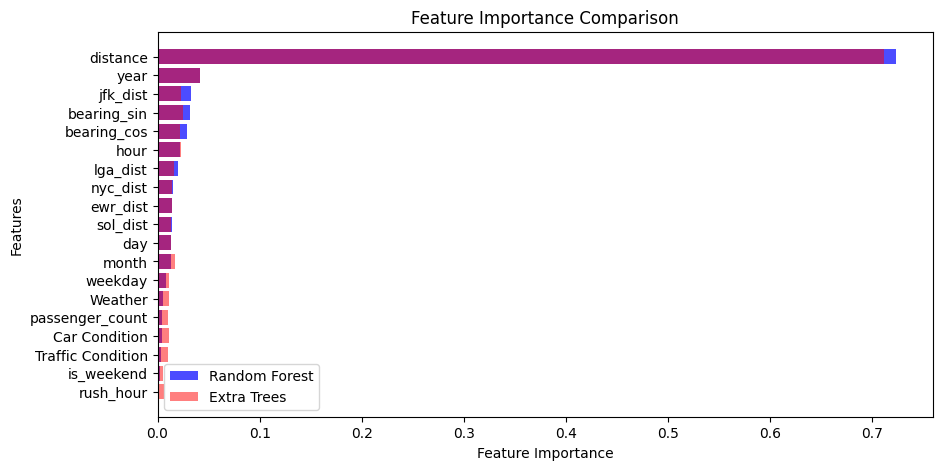

In [24]:
rf_importances = rf_model.feature_importances_
et_importances = et_model.feature_importances_

features = X.columns
importance_df = pd.DataFrame({"Feature": features, "RF Importance": rf_importances, "ET Importance": et_importances})

importance_df = importance_df.sort_values(by="RF Importance", ascending=False)

print(importance_df)

plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["RF Importance"], color='blue', alpha=0.7, label="Random Forest")
plt.barh(importance_df["Feature"], importance_df["ET Importance"], color='red', alpha=0.5, label="Extra Trees")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Comparison")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout
plt.show()


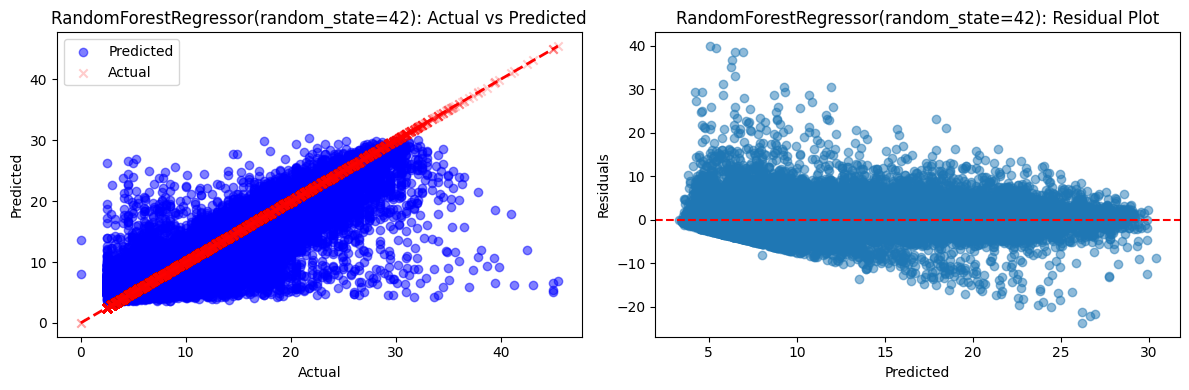

In [25]:
plt.figure(figsize=(12, 4))

# 1. Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_preds, color='blue', alpha=0.5, label='Predicted', marker='o')  # Predicted points in blue circles
plt.scatter(y_test, y_test, color='red', alpha=0.2, label='Actual', marker='x')     # Actual points in red x’s (on diagonal)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)   # Diagonal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"{rf_model}: Actual vs Predicted")
plt.legend()  # Add legend to distinguish

# 2. Residual Plot
plt.subplot(1, 2, 2)
residuals = y_test - rf_preds
plt.scatter(rf_preds, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title(f"{rf_model}: Residual Plot")

plt.tight_layout()

plt.show()


In [26]:
import joblib

joblib.dump(rf_model, "random_forest_model.pkl")

['random_forest_model.pkl']